In [1]:
# train test split used for splitting between train and test data
from sklearn.model_selection import train_test_split
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv('monthly_csv.csv')
raw_x = dataset.iloc[:, 0:1].values
raw_y = dataset.iloc[:, 1].values
raw_x = np.array(raw_x)
for item in raw_x:
    item[0] = (float(item[0][0:4]) * 12) + (float(item[0][5:]))

# Change manual splitting to automatic splitting using train_test_split module
x,test_x,y,test_y = train_test_split(raw_x,raw_y,test_size = 0.25, random_state = 0)

# treeshold = 820

# raw_x = x[:]
# raw_y = dataset.iloc[:, 1].values

# for i in range(0, len(raw_x)):
#     raw_x[i][0] = raw_x[i][0]/23401

# test_x = x[treeshold:]
# test_y = dataset.iloc[treeshold:, 1].values

# x = x[:treeshold]


In [ ]:
# from sklearn.preprocessing import StandardScaler 
# sc_X = StandardScaler() 
# sc_y = StandardScaler() 
# # x = sc_X.fit_transform(raw_x)
# y = sc_y.fit_transform(y.reshape(-1, 1))
# raw_y = sc_y.fit_transform(raw_y.reshape(-1, 1))
# print(x.shape)
# print(test_x.shape)

In [6]:
# print(len(test_x) - 1)
# print(test_x[0][0])
# np.concatenate(( test_x[0], [20] ))
# print(test_x[1])
# print(len(test_x)-1)
for i in range(len(test_x) - 1, 500):
#     print(i)
#     print(test_x[i])
    temp = np.array(np.array([[(test_x[i][0]*23401 + 1)/23401]]))
#     print(temp[0])
    test_x = np.concatenate(( test_x, temp ), axis=0)
#     print(temp)
#     print(test_x)
#     print("---")

# print(len(test_x))
# print(test_x)
    
# a = np.array([1,2,3])
# np.concatenate(([0], a, [4]))
# array([0, 1, 2, 3, 4])

In [3]:
y = y.ravel()
regressor = SVR(kernel="rbf",  gamma='scale', C=85, epsilon=0.3)
regressor.fit(x, y)

SVR(C=85, epsilon=0.3)

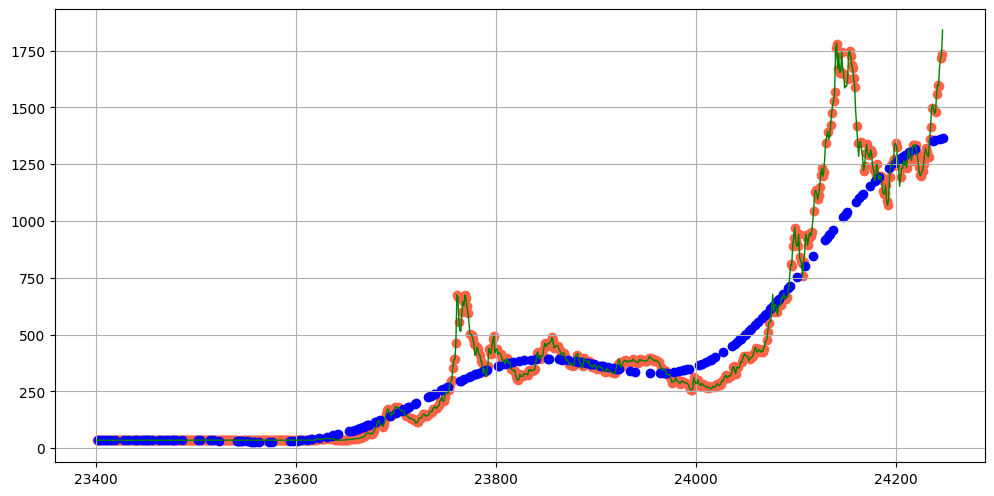

In [7]:
# Predicting a new result =
figure(figsize=(12, 6), dpi=100)
plt.plot(raw_x, raw_y, lw=1,  color='green')
plt.scatter(x, y, color='tomato')
plt.scatter(test_x, regressor.predict(test_x), color='blue')
plt.grid()

In [5]:
# Error calculating with new partitioned data
# print(test_x)
y_pred = regressor.predict(test_x)
# score = regressor.score(test_x, test_y)
# print("R-squared:", score)
# print("MSE:", mean_squared_error(test_y, yfit))

from sklearn import metrics
mse = metrics.mean_squared_error(test_y, y_pred)
mae = metrics.mean_absolute_error(test_y, y_pred)
np.sqrt(metrics.mean_squared_error(test_y, y_pred))
score = regressor.score(test_x, test_y)

print("R-squared:", score)
print("MSE:", mse)
print("MAE:", mae)

R-squared: 0.9049591875334428
MSE: 18325.111489472874
MAE: 70.82595272421997


In [ ]:
max_R = -100000
min_R = 1000000
mse_val = 10000000
c = 0
r_squared = 0;
for i in range(1, 1210):
#     print("===========Predict for C=" + str(i) + "===========")
    regressor = SVR(kernel="rbf",  gamma='scale', C=i, epsilon=0.3)
    regressor.fit(x, y)
    yfit = regressor.predict(test_x)
    score = regressor.score(test_x, test_y)
    max_R = max(min_R, score)
    mse = mean_squared_error(test_y, yfit)
    if mse < mse_val:
        mse_val = mse
        c = i
        r_squared = score
#     print("R-squared:", score)
#     print("MSE:", mean_squared_error(test_y, yfit))
print("R-squared:", r_squared)
print("MSE:", mse_val)
print("C:", c)

In [10]:
regressor.predict([[24400]])

array([1018.40269856])

In [11]:
regressor.predict([[25400]])

array([476.95491944])

In [12]:
print(test_x)

[[24070.0]
 [23623.0]
 [24014.0]
 [24101.0]
 [23993.0]
 [24209.0]
 [23432.0]
 [23546.0]
 [23912.0]
 [23817.0]
 [23672.0]
 [24039.0]
 [23667.0]
 [23752.0]
 [23719.0]
 [24006.0]
 [24050.0]
 [23409.0]
 [24109.0]
 [23551.0]
 [24151.0]
 [23502.0]
 [23504.0]
 [24166.0]
 [24149.0]
 [24129.0]
 [24062.0]
 [24174.0]
 [23456.0]
 [23802.0]
 [23573.0]
 [24137.0]
 [23813.0]
 [23656.0]
 [23898.0]
 [24045.0]
 [24087.0]
 [23700.0]
 [23983.0]
 [23616.0]
 [23478.0]
 [23921.0]
 [23428.0]
 [24133.0]
 [24066.0]
 [24055.0]
 [23987.0]
 [23890.0]
 [23662.0]
 [23415.0]
 [23809.0]
 [23713.0]
 [24019.0]
 [23803.0]
 [23739.0]
 [24199.0]
 [23978.0]
 [23636.0]
 [24163.0]
 [24117.0]
 [24003.0]
 [24160.0]
 [23514.0]
 [24219.0]
 [23964.0]
 [23734.0]
 [24041.0]
 [23545.0]
 [23664.0]
 [23735.0]
 [23601.0]
 [24027.0]
 [23835.0]
 [24237.0]
 [24015.0]
 [23542.0]
 [24092.0]
 [23765.0]
 [23679.0]
 [23823.0]
 [23563.0]
 [23907.0]
 [23543.0]
 [24053.0]
 [24010.0]
 [23939.0]
 [23597.0]
 [24059.0]
 [24247.0]
 [24080.0]
 [23880.0]